In [ ]:
#pip install tensorflow


  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.70.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using


[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#pip install zipfile

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [6]:
import zipfile

# Replace 'your_data.rar' with the actual name of your .rar file
rar_path = 'archive.zip'  # Path to the uploaded .rar file
extract_path = '/content/archive'  # Path to where you want to extract the data

# Open the .rar file
with zipfile.ZipFile(rar_path,'r') as rf:
    rf.extractall(path=extract_path)

# List extracted files to verify
import os
os.listdir(extract_path)

['Testing', 'Training']

In [7]:
import tensorflow

In [8]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
data_training=ImageDataGenerator(rescale=1.0/255,rotation_range=30,vertical_flip=True)#validation_split=.2)
data_testing=ImageDataGenerator(rescale=1.0/255)

In [11]:
train_x=data_training.flow_from_directory(
    r'/content/archive/Training',
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    #color_mode='grayscale',
    subset='training'
)
#val_generator = data_training.flow_from_directory(
#    r'C:/Users/nikit/Downloads/archive/Training',
#    target_size=(128, 128),
#    batch_size=32,
#    class_mode='categorical',
#    color_mode='grayscale',
#    subset='validation'
#)
test_x=data_testing.flow_from_directory(
    r'/content/archive/Testing',
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [13]:
model=Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 126, 126, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │       1,843,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,921,508 (7.33 MB)

 Trainable params: 1,921,124 (7.33 MB)

 Non-trainable params: 384 (1.50 KB)

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(
    monitor='accuracy',
    patience=5,
    verbose=1,
    min_delta=0.00001,
    mode='auto',
)

In [ ]:
history=model.fit(train_x,epochs=20,validation_data=test_x,callbacks=callback)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 810s 5s/step - accuracy: 0.4651 - loss: 2.0630 - val_accuracy: 0.2441 - val_loss: 13.2742
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 801s 4s/step - accuracy: 0.6501 - loss: 0.8941 - val_accuracy: 0.3486 - val_loss: 4.3411
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 788s 4s/step - accuracy: 0.6617 - loss: 0.8057 - val_accuracy: 0.5645 - val_loss: 1.3722
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 789s 4s/step - accuracy: 0.7244 - loss: 0.6745 - val_accuracy: 0.7155 - val_loss: 0.7327
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 790s 4s/step - accuracy: 0.7607 - loss: 0.6109 - val_accuracy: 0.7109 - val_loss: 0.7763
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 781s 4s/step - accuracy: 0.7963 - loss: 0.5149 - val_accuracy: 0.7086 - val_loss: 0.7784
Epoch 7/20
114/179 ━━━━━━━━━━━━━━━━━━━━ 4:29 4s/step - accuracy: 0.8183 - loss: 0.4614

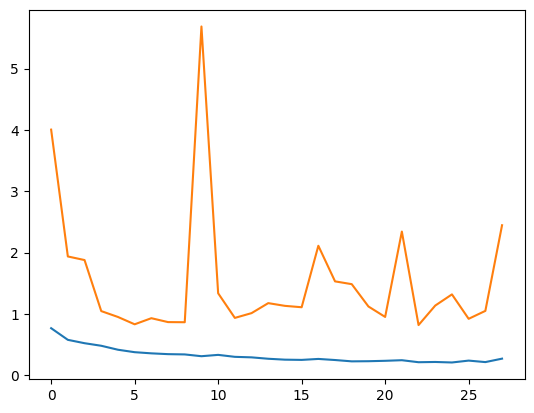

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

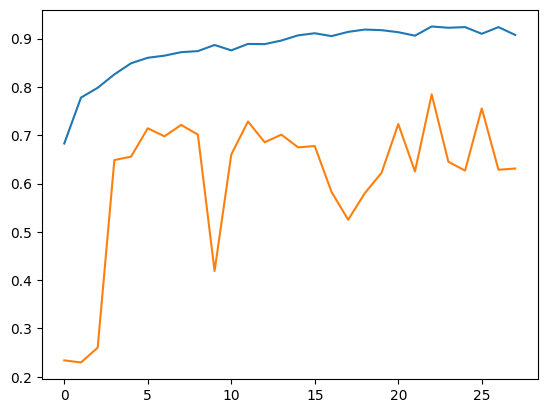

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])